In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [29]:
class LinearRegression:
    def __init__(self, x , y):
        self.data = x
        self.label = y
        self.m = 0
        self.c = 0
        self.n = len(x)
        
    def fit(self , epochs , lr):
        
        #Implementing Gradient Descent
        for i in range(epochs):
            y_pred = self.m * self.data + self.c
            
            #Calculating derivatives w.r.t Parameters
            D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
            D_c = (-1/self.n)*sum(self.label-y_pred)
            
            #Updating Parameters
            self.m = self.m - lr * D_m
            self.c = self.c - lr * D_c
            
    def predict(self , inp):
        y_pred = self.m * inp + self.c 
        return y_pred
    
    def mse(self):
        metric = sum((self.label - self.predict(self.data))**2)/self.n
        return metric
    
    def mae(self):
        metric = sum(abs(self.label - self.predict(self.data)))/self.n
        return metric
        

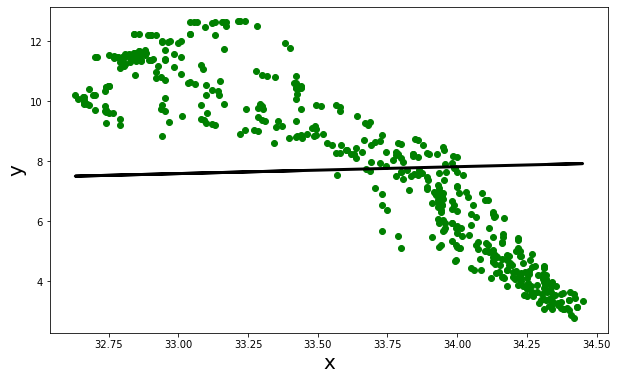

In [31]:
#df = pd.read_csv('train.csv')
df = pd.read_csv('temp.csv')

#Preparing the data
x = np.array(df['salinity'])
y = np.array(df['temperature'])

#Creating the class object
regressor = LinearRegression(x,y)

#Training the model with .fit method
regressor.fit(10000 , 0.00001) # epochs-1000 , learning_rate - 0.0001

#Prediciting the values
y_pred = regressor.predict(x)

#Plotting the results
plt.figure(figsize = (10,6))
plt.scatter(x,y , color = 'green')
plt.plot(x , y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

In [44]:
df = pd.read_csv('temp.csv')

#Preparing the data
x = np.array(df['salinity'])
y = np.array(df['temperature'])
df

,id,salinity,temperature
0,0,33.440,10.50
1,1,33.440,10.46
2,2,33.437,10.46
3,3,33.420,10.45
4,4,33.421,10.45
...,...,...,...
482,495,34.269,4.90
483,496,34.310,4.50
484,497,34.311,4.48
485,498,34.319,4.21


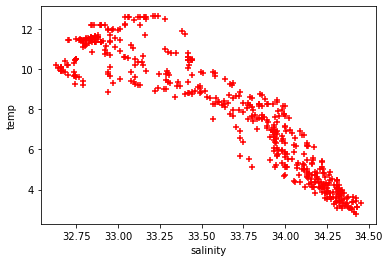

In [45]:
%matplotlib inline
plt.xlabel('salinity')
plt.ylabel('temp')
plt.scatter(x, y, color='red', marker='+')

In [46]:
reg = linear_model.LinearRegression()
reg.fit(df[['salinity']],df.temperature)

LinearRegression()

In [53]:
reg.predict([[33.5]])

array([8.43419339])

In [54]:
reg.coef_

array([-4.79633916])

In [55]:
reg.intercept_

169.1115552420607